# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## V. Analyse des simulations

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv
import time
import sys

## 1. Analyse

## 2. Analyse de l'optimisation de la capacité de production installée :

In [2]:
weather = pd.read_csv('outputs/weather years.csv')
weather.head()

,year,Offshore_capa,Onshore_capa,PV_capa,biogas_capa,hydro_capa,Batt_volume,Methanation_volume,PHS_volume,Offshore_gene,...,Methanation_gene,PHS_gene,LCOE,spot_price,LC,str_loss,cf_offshore,cf_onshore,cf_pv,cf_gas
0,2000,11.46,84.14,105.74,18.24,20.5,60.17,5.52,180,54.08,...,7.21,23.86,47.89,53.83,11.64,5.06,0.538,0.334,0.158,0.139
1,2001,0.38,104.62,105.74,28.61,20.5,41.91,8.45,180,1.77,...,7.33,20.88,48.40,54.20,12.76,4.87,0.537,0.335,0.162,0.089
2,2002,17.12,69.66,105.55,19.16,20.5,74.70,4.60,180,82.05,...,6.31,22.09,46.82,54.60,10.90,4.62,0.547,0.348,0.157,0.127
3,2003,10.21,90.15,106.83,15.70,20.5,62.78,5.62,180,44.99,...,4.90,22.09,49.31,54.21,12.38,3.76,0.503,0.311,0.164,0.088
4,2004,0.00,105.29,113.38,21.88,20.5,70.32,15.30,180,0.00,...,9.95,21.24,50.51,56.91,11.75,6.43,0.509,0.322,0.161,0.130


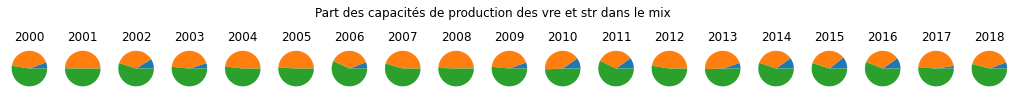

In [3]:
fig, axs = plt.subplots(1,19, figsize=(18,18))
for i in range(19):
    y = np.array([weather["Offshore_capa"][i], weather["Onshore_capa"][i], weather["PV_capa"][i]])
    axs[i].pie(y)
    axs[i].set_title(str(2000+i))
plt.suptitle("Part des capacités de production des vre et str dans le mix", y=0.55)
plt.show()

In [4]:
Q_ademe_2010 = pd.read_csv("Simulations_completes/simu_2010_ademe/simu_2010_ademe_Q.csv", names=["vre", "capa"])
Q_ademe_2011 = pd.read_csv("Simulations_completes/simu_2011_ademe/simu_2011_ademe_Q.csv", names=["vre", "capa"])
Q_ademe_2012 = pd.read_csv("Simulations_completes/simu_2012_ademe/simu_2012_ademe_Q.csv", names=["vre", "capa"])
Q_ademe_2013 = pd.read_csv("Simulations_completes/simu_2013_ademe/simu_2013_ademe_Q.csv", names=["vre", "capa"])
#Q_ademe_2014 = pd.read_csv("Simulations_completes/simu_2014_ademe/simu_2014_ademe_Q.csv", names=["vre", "capa"])
Q_ademe_2015 = pd.read_csv("Simulations_completes/simu_2015_ademe/simu_2015_ademe_Q.csv", names=["vre", "capa"])
Q_ademe_2016 = pd.read_csv("Simulations_completes/simu_2016_ademe/simu_2016_ademe_Q.csv", names=["vre", "capa"])
Q_ademe_2017 = pd.read_csv("Simulations_completes/simu_2017_ademe/simu_2017_ademe_Q.csv", names=["vre", "capa"])
Q_ademe_2010["capa"][1]
Q_ademe_2010

,vre,capa
0,NaN,0.000000
1,offshore,20.000000
2,onshore,79.540251
3,pv,100.474040
4,river,7.500000
5,lake,12.855000
6,biogas,100.000000
7,phs,6.431578
8,battery,11.998170
9,methanation,100.000000


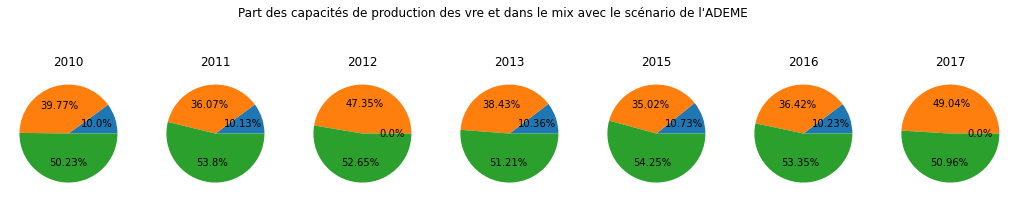

In [5]:
nb_annees = 7
list_capa = [Q_ademe_2010, Q_ademe_2011, Q_ademe_2012, Q_ademe_2013, Q_ademe_2015, Q_ademe_2016, Q_ademe_2017]
fig, axs = plt.subplots(1,nb_annees, figsize=(18,18))

for i in range(nb_annees):
    capa = list_capa[i]
    y = np.array([capa["capa"][1], capa["capa"][2], capa["capa"][3]])
    axs[i].pie(y, autopct = lambda y: str(round(y, 2)) + '%')
    if i <= 3 :
        axs[i].set_title(str(2010+i))
    else :
        axs[i].set_title(str(2011+i))

plt.suptitle("Part des capacités de production des vre et dans le mix avec le scénario de l'ADEME", y=0.6)
plt.show()

## 3. Analyse des variations de la production des vre sur plusieurs années

In [30]:
#simulations avec le scénario de RTE
rte2012 = pd.read_csv("Simulations_completes/simu_2012_rte/simu_2012_rte_hourly_generation.csv")
rte2013 = pd.read_csv("Simulations_completes/simu_2013_rte/simu_2013_rte_hourly_generation.csv")
rte2015 = pd.read_csv("Simulations_completes/simu_2015_rte/simu_2015_rte_hourly_generation.csv")
rte2016 = pd.read_csv("Simulations_completes/simu_2016_rte/simu_2016_rte_hourly_generation.csv")
rte2017 = pd.read_csv("Simulations_completes/simu_2017_rte/simu_2017_rte_hourly_generation.csv")

#simulations avec le scénario de l'ADEME
ademe2012 = pd.read_csv("Simulations_completes/simu_2012_ademe/simu_2012_ademe_hourly_generation.csv")
ademe2013 = pd.read_csv("Simulations_completes/simu_2013_ademe/simu_2013_ademe_hourly_generation.csv")
ademe2015 = pd.read_csv("Simulations_completes/simu_2015_ademe/simu_2015_ademe_hourly_generation.csv")
ademe2016 = pd.read_csv("Simulations_completes/simu_2016_ademe/simu_2016_ademe_hourly_generation.csv")
ademe2017 = pd.read_csv("Simulations_completes/simu_2017_ademe/simu_2017_ademe_hourly_generation.csv")

ademeopti = pd.read_csv("Simulations_opti/simu_opti_ademe/simu_opti_ademe_hourly_generation.csv")

#simulations avec le scénario de NegaWatt
nega2012 = pd.read_csv("Simulations_completes/simu_2012_nega/simu_2012_nega_hourly_generation.csv")
nega2013 = pd.read_csv("Simulations_completes/simu_2013_nega/simu_2013_nega_hourly_generation.csv")
nega2015 = pd.read_csv("Simulations_completes/simu_2015_nega/simu_2015_nega_hourly_generation.csv")
nega2016 = pd.read_csv("Simulations_completes/simu_2016_nega/simu_2016_nega_hourly_generation.csv")
nega2017 = pd.read_csv("Simulations_completes/simu_2017_nega/simu_2017_nega_hourly_generation.csv")

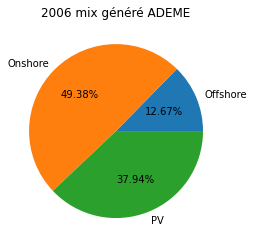

In [29]:
y = Tableau_production(ademeopti)[:3]
plt.pie(y, labels = ["Offshore","Onshore","PV"], autopct = lambda y: str(round(y, 2)) + '%')
plt.title("2006 mix généré ADEME")
plt.show()

In [7]:
# Calcul des productions de chaque technologie à partir des mix obtenus après la simulation
def Tableau_production(p):
    p_offshore = 0
    p_onshore = 0
    p_pv = 0
    p_meth = 0
    p_phs = 0
    p_batterie = 0

    for i in range(8735):
        p_offshore += p['offshore'][i]
        p_onshore += p['onshore'][i]
        p_pv += p['pv'][i]
        p_meth += p['methanation'][i]
        p_phs += p['phs'][i]
        p_batterie += p['battery'][i]
    
    p = np.array([p_offshore,p_onshore,p_pv,p_meth,p_phs,p_batterie])
    return p

In [8]:
# Affichage du diagramme camembert des productions des vre et str
def Affichage_diag(p1,p2,p3,p4,p5,sce):
    p = [p1, p2, p3, p4, p5]
    fig, axs = plt.subplots(1,5, figsize=(18,18))
    
    for i in range(5):
        pp = Tableau_production(p[i])
        print(i, " ", pp)
        y = np.array([pp[0], pp[1], pp[2], pp[3], pp[4], pp[5]])
        axs[i].pie(y, labels = ["Offshore","Onshore","PV","Methanation", "PHS", "Battery",])
        if i <= 1 :
            axs[i].set_title(str(2012+i))
        else :
            axs[i].set_title(str(2013+i))
    plt.suptitle("Part de la production des vre et str dans le mix pour le scénario de " + sce, y=0.6)
    plt.show()

In [9]:
# Affichage du diagramme camembert des productions des vre
def Affichage_diag_vre(p1,p2,p3,p4,p5,sce):
    p = [p1, p2, p3, p4, p5]
    fig, axs = plt.subplots(1,5, figsize=(18,18))
    
    for i in range(5):
        pp = Tableau_production(p[i])
        y = np.array([pp[0], pp[1], pp[2]])
        axs[i].pie(y, labels = ["Offshore","Onshore","PV"], autopct = lambda y: str(round(y, 2)) + '%')
        if i <= 1 :
            axs[i].set_title(str(2012+i))
        else :
            axs[i].set_title(str(2013+i))
    plt.suptitle("Part de la production des vre dans le mix pour le scénario de " + sce, y=0.6)
    plt.show()

### 3.1 Part de la production des vre et str dans les mix de plusieurs années

#### Pour RTE

0   [ 81235.08 339326.44 230990.85  17731.91  16529.05  44212.26]
1   [ 92900.67 335957.04 213226.24  17842.2   15994.06  39212.14]
2   [ 95833.53 336743.27 203098.1   14103.82  15638.48  37626.19]
3   [ 88028.5  321477.46 213064.28  11752.27  16720.49  43872.56]
4   [ 87765.85 322250.18 233277.88  15427.4   16579.06  45438.7 ]


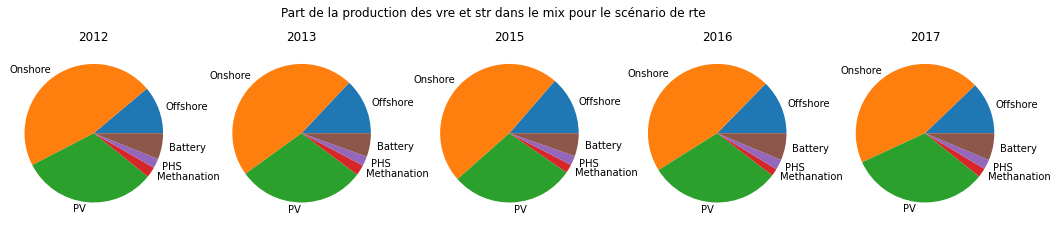

In [10]:
Affichage_diag(rte2012, rte2013, rte2015, rte2016, rte2017, "rte")

### 3.2 Part de la production des vre dans les mix de plusieurs années

#### Pour RTE

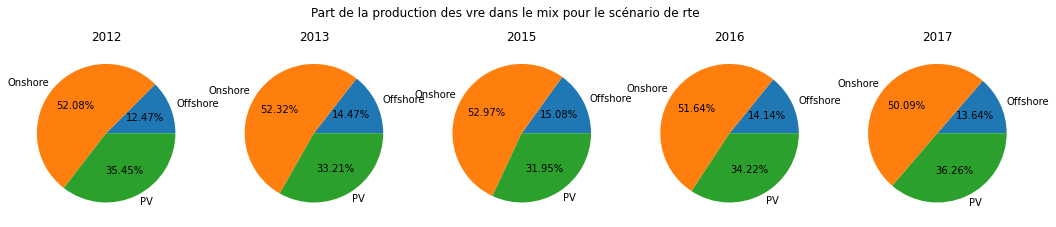

In [11]:
Affichage_diag_vre(rte2012, rte2013, rte2015, rte2016, rte2017, "rte")

#### Pour l'ADEME

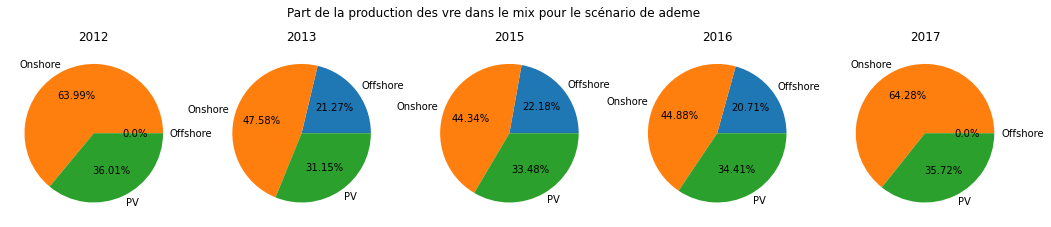

In [12]:
Affichage_diag_vre(ademe2012, ademe2013, ademe2015, ademe2016, ademe2017, "ademe")

#### Pour NégaWatt

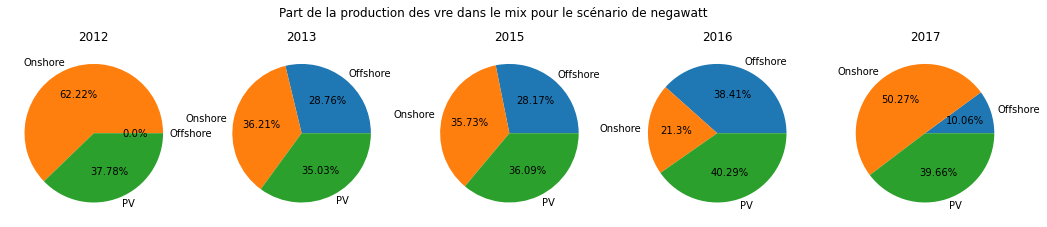

In [31]:
Affichage_diag_vre(nega2012, nega2013, nega2015, nega2016, nega2017, "negawatt")